In [1]:
#Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")


#Import and Iniatilize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Twitter API Keys
consumer_key = "JOj6ys6DaytrezVRJQDubRZoU"

consumer_secret = "SYqdRbMPHDYYhB5e2CgNBhO3HOi8GtWxWAkE15eS8S6n3TfBAd"

access_token = "1002006915621236737-ItxTbjeG2JSV2d1BlAKGLZ1Xkkenao"

access_token_secret = "5uenkDyn3my8FChtWrRpKT0Mj8pGgIAIzJ2rn3zCLWf0n"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#Target Search Term
target_terms = ["@BBCNews","@CBSNews","@FoxNews","@nytimes","@CNN"]

In [3]:
#Variables for holding sentiments/text
sentiments = []
text = []

In [4]:
for news_org in target_terms:
    
    #Counter
    counter = 1

    #Variable for max_id
    oldest_tweet = None

    #Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
    
        #Get all tweets from home feed
        public_tweets = api.user_timeline(news_org, max_id = oldest_tweet)

        #Loop through all tweets
        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            tweets_ago = counter
            
            #Adding values to list
            text.append(tweet["text"])

            #Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet["id"] - 1

            #Add sentiments for each tweet into a list
            sentiments.append({
                "Sources": news_org,
                "Date": tweet["created_at"],
                "Compound": compound,
                "Positive": pos,
                "Negative": neg,
                "Neutral": neu,
                "Tweets Ago": counter
                              })
            #Add to counter
            counter += 1

In [1]:
#Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

NameError: name 'pd' is not defined

In [54]:
# Write DataFame to csv
sentiments_pd.to_csv("Sentiments_data.csv")

In [22]:
CNN_df = sentiments_pd[sentiments_pd.Sources=="@CNN"]
BBCNews_df = sentiments_pd[sentiments_pd.Sources=="@BBCNews"]
CBSNews_df = sentiments_pd[sentiments_pd.Sources=="@CBSNews"]
FoxNews_df = sentiments_pd[sentiments_pd.Sources=="@FoxNews"]
NYTimes_df = sentiments_pd[sentiments_pd.Sources=="@nytimes"]

In [64]:
final_df = pd.DataFrame(sentiments_pd.groupby(['Sources'])['Compound'].mean())
final_df = final_df.reset_index()
final_df

,Sources,Compound
0,@BBCNews,-0.075073
1,@CBSNews,-0.068945
2,@CNN,-0.006167
3,@FoxNews,0.041121
4,@nytimes,-0.015590


# News Mood Scatter Plot

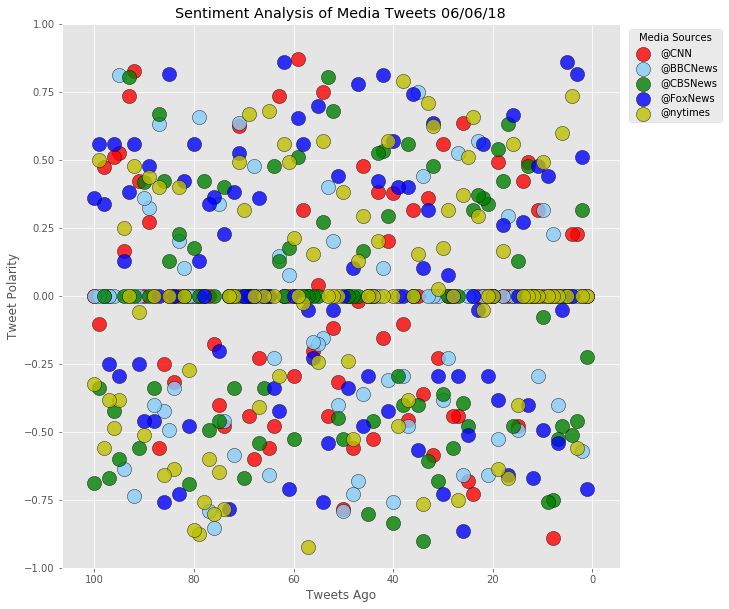

In [94]:
import time
todaysdate = time.strftime("%m/%d/%y")

#Create plot
plt.figure(figsize=(10,10))
from matplotlib import pylab


plt.scatter(CNN_df["Tweets Ago"], CNN_df["Compound"], c="r", edgecolor="black", marker="o", linewidth=0.5, alpha=0.8, s =200, label="@CNN")
plt.scatter(BBCNews_df["Tweets Ago"], BBCNews_df["Compound"], c="lightskyblue", edgecolor="black", marker="o", linewidth=0.5, alpha=0.8, s=200, label="@BBCNews")
plt.scatter(CBSNews_df["Tweets Ago"], CBSNews_df["Compound"], c="g", edgecolor="black", marker="o", linewidth=0.5, alpha=0.8,s=200, label="@CBSNews")
plt.scatter(FoxNews_df["Tweets Ago"], FoxNews_df["Compound"], c="b", edgecolor="black", marker="o", linewidth=0.5, alpha=0.8,s=200, label="@FoxNews")
plt.scatter(NYTimes_df["Tweets Ago"], NYTimes_df["Compound"], c="y", edgecolor="black", marker="o", linewidth=0.5, alpha=0.8,s=200, label="@nytimes")

#Incorporate other graph properties
plt.title(f"Sentiment Analysis of Media Tweets"+ " " + todaysdate)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim(-1,1)
pylab.legend(loc="upper center", bbox_to_anchor=(1.10,1.00),title="Media Sources")
ax = plt.gca()
ax.invert_xaxis()
plt.show()


# Save the figure
plt.savefig("NewsMoodScatterPlot.png")

# News Mood Bar Plot

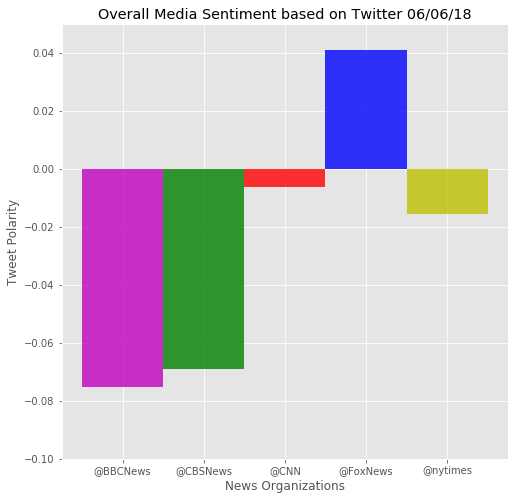

In [93]:
import time
todaysdate = time.strftime("%m/%d/%y")

my_colors = "mgrby"

# Create a bar chart based upon the above data
plt.figure(figsize=(8,8))

plt.bar(final_df.Sources, final_df.Compound, alpha=0.8, width=1.0, color = my_colors)

# Set the limits of the y axis
plt.ylim(-0.10,0.05)

# Give the chart a title, x label, and y label
plt.title(f"Overall Media Sentiment based on Twitter" + " " + todaysdate)
plt.xlabel("News Organizations")
plt.ylabel("Tweet Polarity")

# Save an image of the chart and print it to the screen
plt.savefig("NewsMoodBarPlot.png")

plt.show()